## Importing with skimage and openCV

https://www.youtube.com/watch?v=Q5yVpymvjxU&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=23

https://datacarpentry.org/image-processing/aio/index.html

In [17]:
import numpy as np
# pip install scikit-image
from skimage import io, img_as_float, img_as_ubyte

# pip install opencv-python
import cv2

import matplotlib.pyplot as plt
# importing ipympl makes the plots interactive 
#import ipympl
# it appears to load the latest plot image only

## Skimage

(3024, 4032, 3)
[147 145 148]
<class 'numpy.ndarray'>


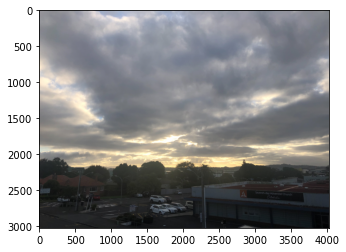

In [18]:
image = io.imread(fname='Images/20220426_1.jpg')

print(image.shape)
print(image[0,0]) # RGB for top, left pixel
print(type(image))

plt.imshow(image)
plt.show()

# array shape is Y, X, C (channels = R, G, B)
# note that OpenCV reads the channels in as B, G, R

(3024, 4032, 3)
[0.57647059 0.56862745 0.58039216]
<class 'numpy.ndarray'>


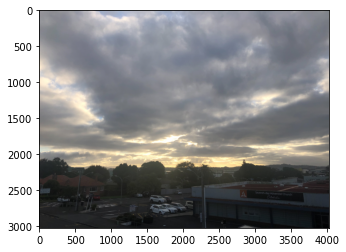

In [19]:
# Converted the RGB values from whole numbers to scaled from 0 - 1
# we would want to do this if we want to do some transformations
image_float = img_as_float(image)

print(image_float.shape)
print(image_float[0,0]) # float RGB for top, left pixel
print(type(image_float))

plt.imshow(image_float)
plt.show()

(3024, 4032, 3)
[147 145 148]
<class 'numpy.ndarray'>


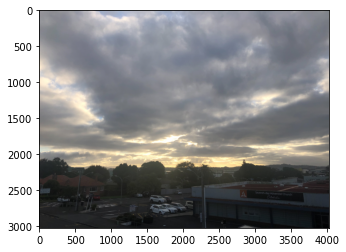

In [20]:
# Convert it back to 8 bit if we want to save it in image format
image_ubite_8bit = img_as_ubyte(image_float)

print(image_ubite_8bit.shape)
print(image_ubite_8bit[0,0]) # RGB for top, left pixel
print(type(image_ubite_8bit))

plt.imshow(image_ubite_8bit)
plt.show()

## Open CV 

(3024, 4032, 3)
[148 145 147]
<class 'numpy.ndarray'>


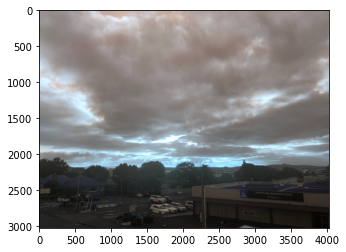

In [21]:
image_cv = cv2.imread('Images/20220426_1.jpg')
# 1 could be passed in as a positional argument after the fig path
# to specify importing color, but this is the default 
# open CV reads BGR not RGB

print(image_cv.shape)
print(image_cv[0,0]) # BGR for top, left pixel
print(type(image_cv))

plt.imshow(image_cv)
plt.show()

(3024, 4032)
146
<class 'numpy.ndarray'>


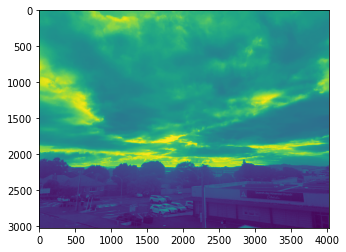

In [22]:
# open CV import as grey scale 

image_cv_greyscale = cv2.imread('Images/20220426_1.jpg', 0)
# open CV reads BGR not RGB

print(image_cv_greyscale.shape)
print(image_cv_greyscale[0,0]) # grey scale for top, left pixel
print(type(image_cv_greyscale))

plt.imshow(image_cv_greyscale)
plt.show()

(3024, 4032, 3)
[147 145 148]
<class 'numpy.ndarray'>


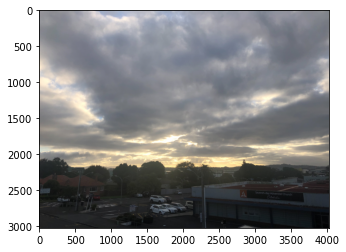

In [23]:
# convert BGR to RGB
image_cv_RGB = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
# COLOR_BGR2HSV 

print(image_cv_RGB.shape)
print(image_cv_RGB[0,0]) # BGR for top, left pixel
print(type(image_cv_RGB))

plt.imshow(image_cv_RGB)
plt.show()

WARNING If you save images using open CV, they will be saved as BGR not RGB

## Interoperability

In [24]:
image_float # the float object from skimage testing above
image_cv_RGB_float = img_as_float(image_cv_RGB)

print(image_float[0,0]) # float RGB for top, left pixel
print(image_cv_RGB_float[0,0]) # float RGB for top, left pixel

# yealds the same results for the top left pixel 

[0.57647059 0.56862745 0.58039216]
[0.57647059 0.56862745 0.58039216]


https://stackoverflow.com/questions/59669715/fastest-way-to-find-the-rgb-pixel-color-count-of-image

https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html